## Lead Scoring Case Study

In [1]:
# Importing packages and Reading Data
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#Reading Dataset
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Reading and Understanding the Data

In [3]:
#shape of the dataframe
df.shape

(9240, 37)

In [4]:
#basic info of the datframe like, data type, number of columns and rows, data size etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#descriptive ststistics of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#count of null values in the dataframe column wise
df.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

As we see form the above data, there are null values in the dataset and also as the problem statement stated, we also need to treat `Select` values in the data as its the default values in the webpage

In [7]:
#Percentage of missing values in each column
round(df.isnull().sum()*100/len(df),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

So we got missing value at 51.59% at max, but we also understand form the probelm statement that `Select` is also a null value.
This might be happened because these fields in the website might be non mandatory fields with drop downs options for the customer to choose from. Amongst the dropdown values, the default option is probably 'Select' and since these aren't mandatory fields, many customer might have have chosen to leave it as the default value 'Select'.

So replace the select in the cells with blank

## Data cleaning

In [8]:
#Storing the categorical variables in to a new df to trate the Select values 
df_object = df.select_dtypes(include=[object])
df_object = df_object.drop(['Prospect ID'], axis=1)

In [9]:
#Now lets visualize the content of the categorical vairables to understand the content 
column_list=list(df_object.columns)
for i in column_list:
    print(df_object[i].value_counts())
    print('*******************************************************************')
    

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
*******************************************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64
*******************************************************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*************************************

From the above content we can understand that data few variables contains `Select` and will replace that with null

In [10]:
#Remove columns which has only one unique value

"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Update me on Supply Chain Content
I agree to pay the amount through cheque

""" 
df= df.loc[:,df.nunique()!=1]
df.shape

(9240, 32)

In [11]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
df = df.drop('Asymmetrique Activity Score', axis=1)
df = df.drop('Asymmetrique Profile Score', axis=1)
df.shape

(9240, 30)

In [12]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
df = df.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
df.shape

(9240, 29)

In [13]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
df = df.drop('What matters most to you in choosing a course', axis=1)
df.shape

(9240, 28)

In [14]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
df = df.drop('How did you hear about X Education', axis=1)
df.shape

(9240, 27)

### Removing rows where a particular column has high missing values

In [15]:
df['Lead Source'].isnull().sum()

36

In [16]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
df = df[~pd.isnull(df['Lead Source'])]
df.shape

(9204, 27)

### Assigning An Unique Category to NULL/SELECT values
#### Instead of deleting columns with huge null value percentage(which results in loss of data), this strategy adds more information into the dataset and results in the change of variance.
#### Creating a new category consisting on NULL/Select values for the field Lead Quality

### 'Select' values in some columns :
#### There are some columns in dataset which have a level/value called 'Select'. This might have happened because these fields in the website might be non mandatory fields with drop downs options for the customer to choose from. Amongst the dropdown values, the default option is probably 'Select' and since these aren't mandatory fields, many customer might have have chosen to leave it as the default value 'Select'.¶

In [17]:
df['Lead Quality'].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [18]:
df['Lead Quality'].isnull().sum()

4753

In [19]:
df['Lead Quality'].fillna("Unknown", inplace = True)
df['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

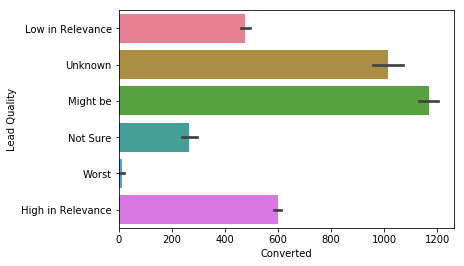

In [20]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=df, estimator=np.sum)

### Creating a new category consisting on NULL/Select values for the field Asymmetrique Profile Index

In [21]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [22]:
df['Asymmetrique Profile Index'].isnull().sum()

4201

In [23]:
df['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
df['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

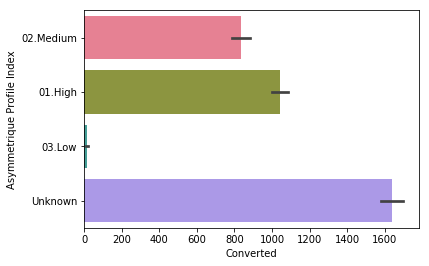

In [24]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=df, estimator=np.sum)


### Creating a new category consisting on NULL/Select values for the field Asymmetrique Activity Index

In [25]:
df['Asymmetrique Activity Index'].value_counts()


02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [26]:
df['Asymmetrique Activity Index'].isnull().sum()

4201

In [27]:
df['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
df['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

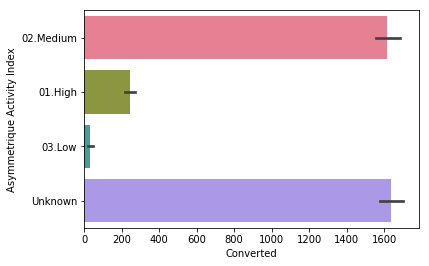

In [28]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=df, estimator=np.sum)


### Creating a new category consisting on NULL/Select values for the field City

In [29]:
df['City'].isnull().sum()

1420

In [30]:
df['City'].fillna("Unknown", inplace = True)
df['City'].value_counts()

Mumbai                         3220
Select                         2218
Unknown                        1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
df['City'].replace('Select', 'Unknown', inplace =True)
df['City'].value_counts()

Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

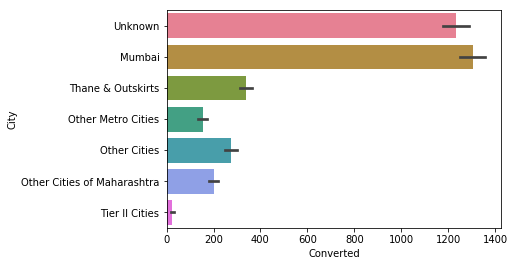

In [32]:
sns.barplot(y='City', x='Converted', palette='husl', data=df, estimator=np.sum)


#### Creating a new category consisting on NULL/Select values for the field Last Activity

In [33]:
df['Last Activity'].value_counts()


Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
df['Last Activity'].isnull().sum()


101

In [35]:
df['Last Activity'].fillna("Unknown", inplace = True)
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

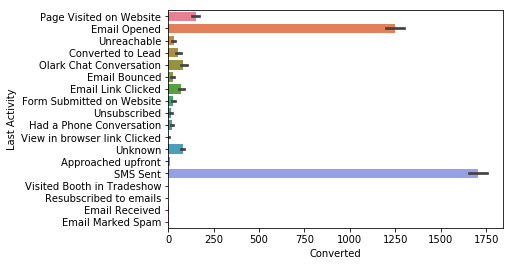

In [36]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=df, estimator=np.sum)


#### Creating a new category consisting on NULL/Select values for the field Lead Profile

In [37]:
df['Lead Profile'].value_counts()


Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
df['Lead Profile'].isnull().sum()


2709

In [39]:
df['Lead Profile'].fillna("Unknown", inplace = True)
df['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [40]:
df['Lead Profile'].replace('Select', 'Unknown', inplace =True)
df['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

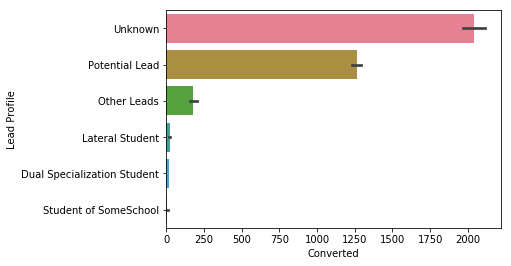

In [41]:
sns.barplot(y='Lead Profile', x='Converted', palette='husl', data=df, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field What is your current occupation

In [42]:
df['What is your current occupation'].value_counts()


Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [43]:
df['What is your current occupation'].isnull().sum()


2690

In [44]:
df['What is your current occupation'].fillna("Unknown", inplace = True)
df['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

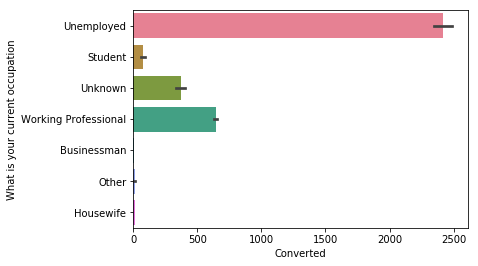

In [45]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=df, estimator=np.sum)

#### Creating a new category consisting on NULL/Select values for the field Specialization

In [46]:
df['Specialization'].value_counts()


Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [47]:
df['Specialization'].isnull().sum()


1438

In [48]:

df['Specialization'].fillna("Unknown", inplace = True)
df['Specialization'].value_counts()

Select                               1914
Unknown                              1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [49]:

df['Specialization'].replace('Select', 'Unknown', inplace =True)
df['Specialization'].value_counts()

Unknown                              3352
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

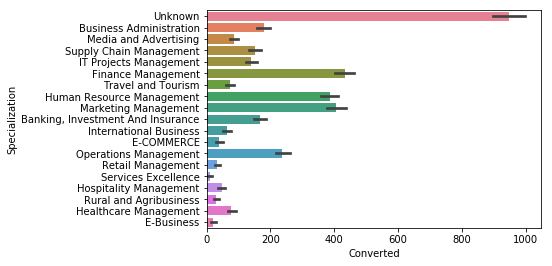

In [50]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=df, estimator=np.sum)


#### Creating a new category consisting on NULL/Select values for the field Tags

In [51]:
df['Tags'].value_counts()


Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [52]:
df['Tags'].isnull().sum()


3342

In [53]:
df['Tags'].fillna("Unknown", inplace = True)
df['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

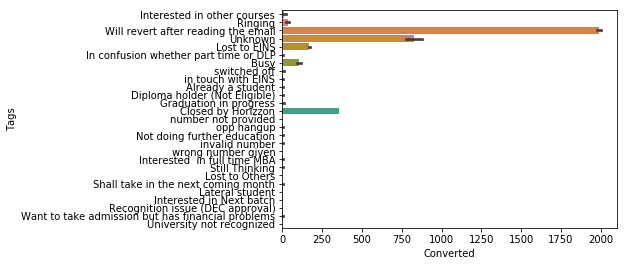

In [54]:
sns.barplot(y='Tags', x='Converted', palette='husl', data=df, estimator=np.sum)


In [55]:
#Analysing the content of the variable - country
df['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Bangladesh                 2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Uganda                     2
China                      2
Netherlands                2
Ghana                      2
Belgium                    2
Vietnam                    1
Kenya                      1
Russia                     1
Liberia                    1
Switzerland                1
Tanzania                   1
Denmark       

In [56]:
#Will try to fill the null values with mode and see how the data is spread
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

Will try to cetegorise the countries into two group, such as Indian and Outside India and lets see if it helps to our analysis

In [57]:
#Will try to cetegorise the countries into two group, such as Indian and Outside India and lets see if it helps to our analysis
df['Country'] = df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
df['Country'].value_counts()

India            8917
Outside India     287
Name: Country, dtype: int64

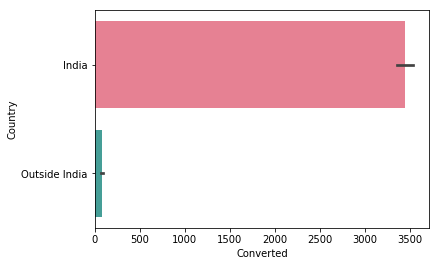

In [58]:
#Plotting the variable - country
sns.barplot(y='Country', x='Converted', palette='husl', data=df, estimator=np.sum)

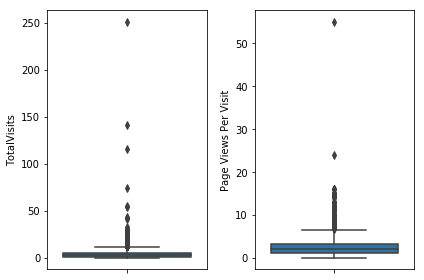

In [59]:
#Lets analysis the data distribution of variable by plotting - Total visit and Page Views Per Visit
plt.subplot(1,2,1)
sns.boxplot(df['TotalVisits'], orient = 'v')
plt.subplot(1,2,2)
sns.boxplot(df['Page Views Per Visit'], orient = 'v')

plt.tight_layout()

Form the above graph we can observe that data is mostly distributed from zero to 10 or at max 20 in both the column. So will use the media to impute the data

In [60]:
#Filling the null with median
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace = True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace = True)

In [61]:
#filling the missing values with mode
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace = True)
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace = True)

In [62]:
#Percentage of missing values in each column after imputing the columns
round(df.isnull().sum()*100/len(df),2).sort_values(ascending=False)

Last Notable Activity                     0.0
What is your current occupation           0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
Search                                    0.0
A free copy of Mastering The Interview    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
Lead Quality                      

In [63]:
#Describing the coumns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.449587,489.005541,2.364923
std,23418.830233,0.486324,4.824662,547.980340,2.145999
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


So far, we have dropped and imputed the variables with the Null values in it and we got a df with zero null values in it.
Now let’s analyse the outliers and try to treat them if any

With the help of visualisation, will analyse the contents of the variables

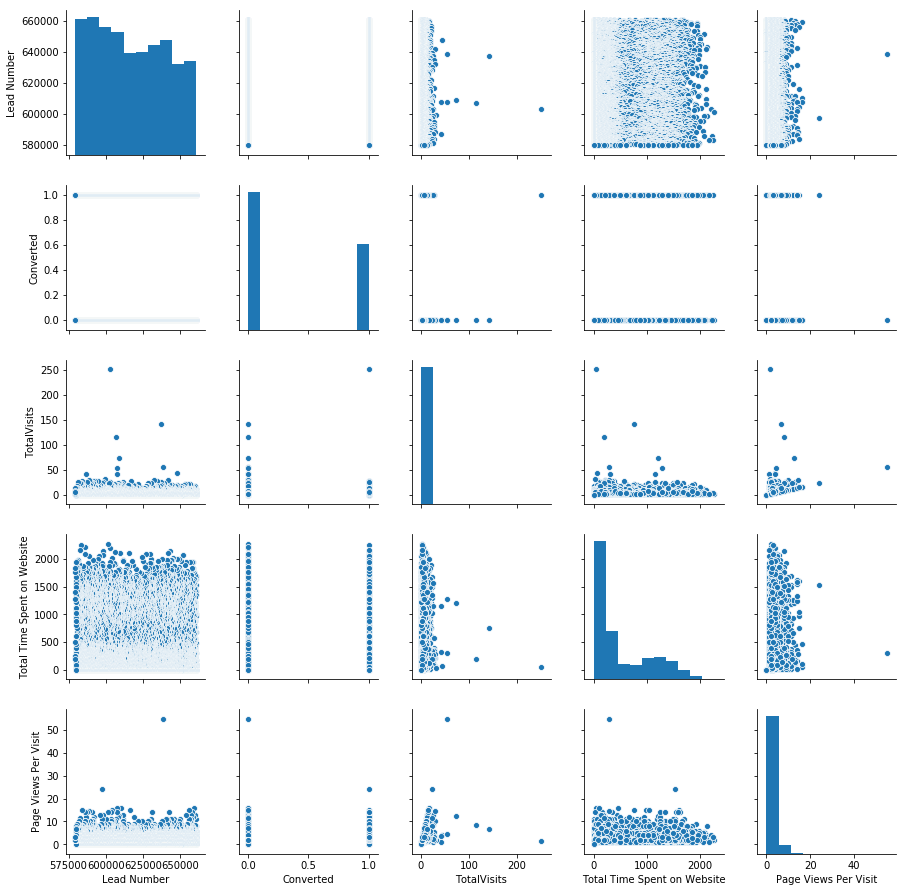

In [64]:
#will use pairplot to analyse the content
sns.pairplot(df)

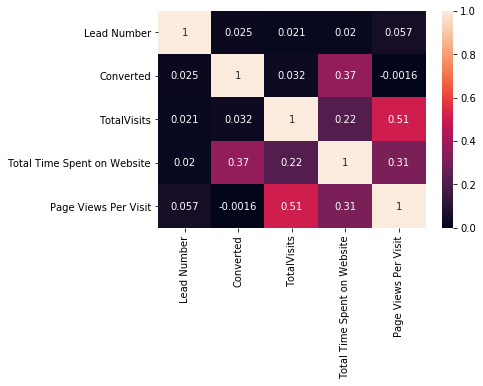

In [65]:
#Will try to see the correlations in the df
sns.heatmap(df.corr(), annot=True)

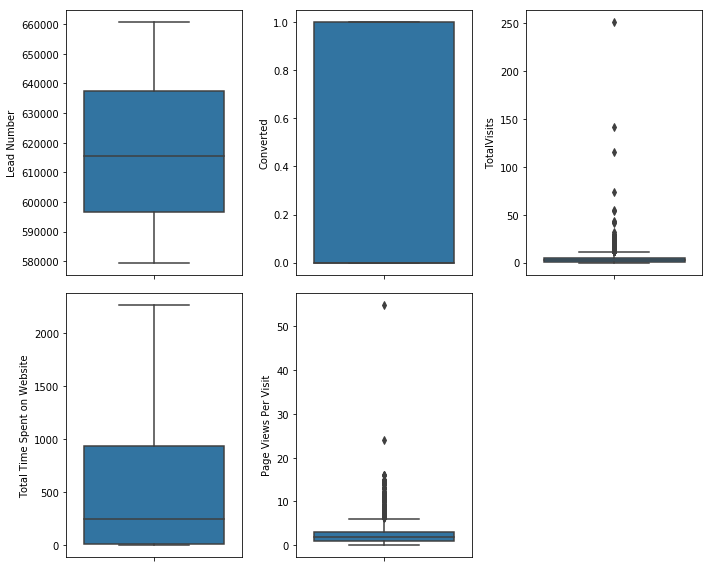

In [66]:
#Plotting the boxplot to analyse the outliers
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(y='Lead Number',data=df)
plt.subplot(2,3,2)
sns.boxplot(y='Converted',data=df)
plt.subplot(2,3,3)
sns.boxplot(y='TotalVisits',data=df)
plt.subplot(2,3,4)
sns.boxplot(y='Total Time Spent on Website',data=df)
plt.subplot(2,3,5)
sns.boxplot(y='Page Views Per Visit',data=df)

plt.tight_layout()

**Inference**
- Lead Number -it has outliers and will try to treat it
- Converted - doesn’t have outliers and data contain only the numeric 0 or 1 so it doesn’t
- TotalVisits - it has outliers and will try to treat it
- Page Views Per Visit - it has outliers and will try to treat it
- Total Time Spent on Website - doesn’t have any outliers

Now will try to treat the outliers in the variable TotalVisits and Page Views Per Visit by further understanding the data using quantile function

In [67]:
#Will use the quntile to identify the distrubution of the numbers
print(df['TotalVisits'].quantile([.9,0.91,.92,.93,.94,.95,.96,.97,.98,.99,1]))
print(df['Page Views Per Visit'].quantile([.9,0.91,.92,.93,.94,.95,.96,.97,.98,.99,1]))

0.90      7.0
0.91      8.0
0.92      8.0
0.93      8.0
0.94      9.0
0.95     10.0
0.96     10.0
0.97     11.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64
0.90     5.0
0.91     5.0
0.92     5.0
0.93     5.0
0.94     6.0
0.95     6.0
0.96     6.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64


Based on the above numbers it seems 100th percentiles is the outlier but if we remove only the 100th percentile then we are still left with outliers in the variable, so will go with 95 percentiles.

In [68]:
#dropping the data above 95 percentile in variable - TotalVisits
quantile_1 = df['TotalVisits'].quantile(0.95)
df = df[(df['TotalVisits'] <= quantile_1)]

In [69]:
#dropping the data above 95 percentile in variable - Page Views Per Visit
quantile_2 = df['Page Views Per Visit'].quantile(0.95)
df = df[(df['Page Views Per Visit'] <= quantile_2)]
df.shape

(8575, 27)

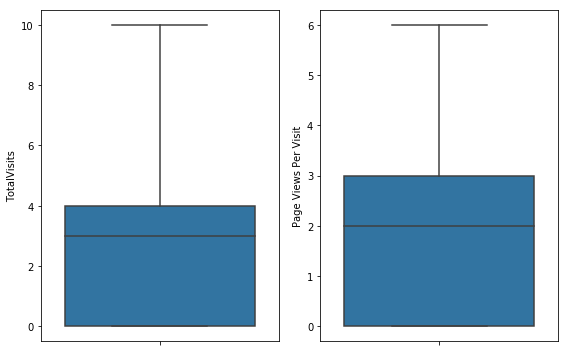

In [70]:
#Will plot the variables after treating the outliers and see how the data is distributed
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(df['TotalVisits'], orient='v')

plt.subplot(1,2,2)
sns.boxplot(df['Page Views Per Visit'], orient='v')

plt.tight_layout()

Now the data is without null values and doesn’t contains any outliers. Further we try to analyse and understand the categorical variables

In [71]:
#Storing the categorical variables in to a new df to analyse data distrubution 
df_cat=df.select_dtypes(include=[object])

column_list=list(df_cat.columns)
for i in column_list:
    print(df_cat[i].value_counts())
    print('*******************************************************************')

Landing Page Submission    4407
API                        3435
Lead Add Form               680
Lead Import                  53
Name: Lead Origin, dtype: int64
*******************************************************************
Google               2709
Direct Traffic       2349
Olark Chat           1744
Organic Search        919
Reference             531
Welingak Website      141
Referral Sites        102
Facebook               54
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
blog                    1
Pay per Click Ads       1
Press_Release           1
testone                 1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64
*******************************************************************
No     7920
Yes     655
Name: Do Not Email, dtype: int64
*******************************************************************
N

Based on the above unique of each value in categorical column, we can drop the following list of variables as either the data contains just one unique in the complete column for e.g. No or containing two option as Yes or No but it is highly unbalanced data

Also, we can drop Prospect ID and Lead Number as it does not help in our analysis

In [72]:
df= df.loc[:,df.nunique()!=1]
df.shape

(8575, 25)

In [73]:
#Storing the categorical variables in to a new df to analyse data distrubution 
df_cat=df.select_dtypes(include=[object])

column_list=list(df_cat.columns)
for i in column_list:
    print(df_cat[i].value_counts())
    print('*******************************************************************')

Landing Page Submission    4407
API                        3435
Lead Add Form               680
Lead Import                  53
Name: Lead Origin, dtype: int64
*******************************************************************
Google               2709
Direct Traffic       2349
Olark Chat           1744
Organic Search        919
Reference             531
Welingak Website      141
Referral Sites        102
Facebook               54
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
blog                    1
Pay per Click Ads       1
Press_Release           1
testone                 1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64
*******************************************************************
No     7920
Yes     655
Name: Do Not Email, dtype: int64
*******************************************************************
N

## Data Preparation

As we see there are categorical variables in the data and we need to use dummies to convert them so that we can use in our logistic regression

In [74]:
#View of the dataframe
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,No,Modified


In [75]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,No,Modified


In [76]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,0,Modified


In [77]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
df_dummies=pd.get_dummies(df[['Lead Origin','Lead Source','Country','Last Notable Activity']],drop_first=True)

In [78]:
#shape of dummy df
df_dummies.shape

(8575, 39)

In [79]:
# Merging Dummies and original data frame 
df_final=pd.concat([df,df_dummies],axis=1)
df_final.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [80]:
df_final=df_final.drop(['Lead Number'], 1)

# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Quality'
ml = pd.get_dummies(df_final['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(df_final['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(df_final['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(df_final['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(df_final['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(df_final['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(df_final['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(df_final['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(df_final['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
df_final = pd.concat([df_final,ml1], axis=1)
#--------------------------------------------------------------------------------------
df_final.shape

(8575, 152)

In [81]:

# We have created dummies for the below variables, so we can drop them
df_final = df_final.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
df_final.shape

(8575, 139)

In [82]:
#Shape of the df
df_final.shape

(8575, 139)

## Splitting the Data into Training and Testing Sets

In [83]:
# Putting feature variable to X
X = df_final.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Putting response variable to y
y = df_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features
As we see the data is the df is not at uniform scale, so will use standard scaler to rescale the required variable

In [86]:
# Scale all the numeric features present in the dataset
scaler = StandardScaler()

X_train[['TotalVisits',
         'Total Time Spent on Website',
         'Page Views Per Visit',
         'A free copy of Mastering The Interview']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                    'Total Time Spent on Website',
                                                                                    'Page Views Per Visit',
                                                                                    'A free copy of Mastering The Interview']])

X_train.head()

C:\Users\BAJARANGI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\BAJARANGI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,-0.643608,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,-0.643608,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,-0.643608,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,-0.643608,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,-0.643608,...,0,0,1,0,0,0,0,0,0,0


In [87]:
#describing the scalled df
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.000000,6002.000000,6002.000000,6.002000e+03,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,6.130088e-17,1.427826e-16,1.538996e-17,0.001000,0.000167,0.000333,0.000333,6.910315e-16,...,0.014162,0.002499,0.111629,0.063146,0.0,0.298567,0.010163,0.007331,0.000333,0.000167
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.012908,0.018253,0.018253,1.000083e+00,...,0.118168,0.049933,0.314936,0.243245,0.0,0.457668,0.100308,0.085313,0.018253,0.012908
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.000000,0.000000,0.000000,-6.436085e-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.000000,0.000000,0.000000,-6.436085e-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.000000,0.000000,0.000000,-6.436085e-01,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.000000,0.000000,0.000000,1.553740e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,1.000000,1.000000,1.000000,1.553740e+00,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building
Let's now move to model building. will build the first model with al the variables the df contains

In [88]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5872
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        19:37:04   Pearson chi2:                 2.23e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -4.035e+15   1.08e+08  -3.72e+07      0.000   -4.03e+15   -4.03e+15
Do Not Email                                           -4.632e+14   4.66e+06  -9.95e+07      0.000   -4.63e+14   -4.63e+14
Do Not Call                                             3.574e+06      0.077   4.62e+07      0.000    3.57e+06    3.57e+06
TotalVisits                                             9.297e+13   1.51e+06   6.17e+07      0.000     9.3e+13     9.3e+13
Total Time Spent on Website                             2.102e+14   9.39e+05   2.24e+08      0.000     2.1e+14     2.1e+14
Page Views Per Visit                                   -4.369e+13   1.59e+06  -2.74e+07      0.000   -4.37e+13   -4.37e+13
Search                                                  1.498e+14    2.9e+07   5.16e+06      0.000     1.5e+14     1.5e+14
Newspaper                                               8.835e+13   6.76e+07   1.31e+06      0.000    8.83e+13    8.83e+13
Digital Advertisement                                   5.303e+14   4.85e+07   1.09e+07      0.000     5.3e+14     5.3e+14
Through Recommendations                                -1.075e+15      5e+07  -2.15e+07      0.000   -1.08e+15   -1.08e+15
A free copy of Mastering The Interview                 -2.651e+13   1.33e+06  -1.99e+07      0.000   -2.65e+13   -2.65e+13
Lead Origin_Landing Page Submission                    -7.291e+13   4.28e+06   -1.7e+07      0.000   -7.29e+13   -7.29e+13
Lead Origin_Lead Add Form                               3.419e+15   6.77e+07   5.05e+07      0.000    3.42e+15    3.42e+15
Lead Origin_Lead Import                                 1.939e+15   4.01e+07   4.83e+07      0.000    1.94e+15    1.94e+15
Lead Source_Direct Traffic                              4.102e+15   7.95e+07   5.16e+07      0.000     4.1e+15     4.1e+15
Lead Source_Facebook                                    1.939e+15   4.01e+07   4.83e+07      0.000    1.94e+15    1.94e+15
Lead Source_Google                                      4.082e+15   7.95e+07   5.13e+07      0.000    4.08e+15    4.08e+15
Lead Source_Live Chat                                   1.542e+15   6.31e+07   2.44e+07      0.000    1.54e+15    1.54e+15
Lead Source_NC_EDM                                      8.866e+15   1.04e+08   8.51e+07      0.000    8.87e+15    8.87e+15
Lead Source_Olark Chat                                   4.44e+15   7.94e+07   5.59e+07      0.000    4.44e+15    4.44e+15
Lead Source_Organic Search                                4.1e+15   7.96e+07   5.15e+07      0.000     4.1e+15     4.1e+15
Lead Source_Pay per Click Ads                           4.246e+15   1.04e+08   4.07e+07      0.000    4.25e+15    4.25e+15
Lead Source_Press_Release                              -2.593e+06      0.056  -4.62e+07

As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [89]:
#Assigning logistciregression
logreg = LogisticRegression()

In [90]:
#Importing the FRE and will select the 10 variable using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [91]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('Do Not Call', False, 118),
 ('TotalVisits', False, 70),
 ('Total Time Spent on Website', False, 15),
 ('Page Views Per Visit', False, 57),
 ('Search', False, 26),
 ('Newspaper', False, 94),
 ('Digital Advertisement', False, 81),
 ('Through Recommendations', False, 103),
 ('A free copy of Mastering The Interview', False, 101),
 ('Lead Origin_Landing Page Submission', False, 84),
 ('Lead Origin_Lead Add Form', False, 24),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 109),
 ('Lead Source_NC_EDM', False, 35),
 ('Lead Source_Olark Chat', False, 80),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 110),
 ('Lead Source_Press_Release', False, 119),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 112),
 ('Lead

In [92]:
# creating a df with all the columns seleceted by RFE
col = X_train.columns[rfe.support_]

In [93]:
#list of vriables which wa snot selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=118)

**Now by reviewing the stats of the model, will fine tune the model**

In [94]:
#creaitng model 2 with the help of columnes selected by FTE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5981
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.7
Date:                Mon, 18 Nov 2019   Deviance:                       2529.4
Time:                        19:37:08   Pearson chi2:                 8.56e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4929      0.090    -27.836      0.000      -2.668      -2.317
Lead Source_Welingak Website                             3.2281      0.731      4.414      0.000       1.795       4.662
Lead Quality_Worst                                      -2.5504      0.761     -3.354      0.001      -4.041      -1.060
Asymmetrique Activity Index_03.Low                      -2.4592      0.358     -6.869      0.000      -3.161      -1.758
Tags_Already a student                                  -3.8785      0.726     -5.344      0.000      -5.301      -2.456
Tags_Closed by Horizzon                                  5.1421      0.722      7.120      0.000       3.727       6.558
Tags_Diploma holder (Not Eligible)                     -24.1871   2.82e+04     -0.001      0.999   -5.52e+04    5.52e+04
Tags_Interested  in full time MBA                       -3.0545      0.742     -4.117      0.000      -4.509      -1.600
Tags_Interested in other courses                        -3.0288      0.330     -9.183      0.000      -3.675      -2.382
Tags_Lost to EINS                                        6.3792      0.831      7.677      0.000       4.751       8.008
Tags_Not doing further education                        -3.7904      1.032     -3.674      0.000      -5.813      -1.768
Tags_Ringing                                            -4.2659      0.249    -17.107      0.000      -4.755      -3.777
Tags_Will revert after reading the email                 3.5963      0.194     18.561      0.000       3.217       3.976
Tags_invalid number                                    -25.7192    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_number not provided                               -25.9733    4.5e+04     -0.001      1.000   -8.82e+04    8.82e+04
Tags_opp hangup                                         -3.5152      1.063     -3.308      0.001      -5.598      -1.433
Tags_switched off                                       -5.1620      0.724     -7.126      0.000      -6.582      -3.742
Tags_wrong number given                                -26.1206   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
What is your current occupation_Unemployed               2.0649      0.119     17.357      0.000       1.832       2.298
What is your current occupation_Working Professional     2.1458      0.364      5.903      0.000       1.433       2.858
Last Activity_SMS Sent                                   2.0390      0.112     18.174      0.000       1.819       2.259
========================================================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.30
9,Tags_Not doing further education,1.27
15,Tags_switched off,1.20
5,Tags_Diploma holder (Not Eligible),1.12
6,Tags_Interested in full time MBA,1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
16,Tags_wrong number given,1.04


**We see that few features has P value more that 5, will remove them**

In [96]:
#Dropping Last Notable Activity_Had a Phone Conversation as it has P values greater than 5
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [97]:
#Building model 3 after dropping the variable - Last Notable Activity_Had a Phone
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5982
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.7
Date:                Mon, 18 Nov 2019   Deviance:                       2557.4
Time:                        19:37:09   Pearson chi2:                 8.49e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4804      0.089    -27.881      0.000      -2.655      -2.306
Lead Source_Welingak Website                             3.2918      0.731      4.503      0.000       1.859       4.725
Lead Quality_Worst                                      -2.7112      0.739     -3.668      0.000      -4.160      -1.263
Asymmetrique Activity Index_03.Low                      -2.4342      0.357     -6.817      0.000      -3.134      -1.734
Tags_Already a student                                  -3.8015      0.724     -5.247      0.000      -5.221      -2.382
Tags_Closed by Horizzon                                  5.1851      0.722      7.184      0.000       3.770       6.600
Tags_Diploma holder (Not Eligible)                     -24.1120   2.81e+04     -0.001      0.999   -5.51e+04    5.51e+04
Tags_Interested  in full time MBA                       -2.9855      0.741     -4.028      0.000      -4.438      -1.533
Tags_Interested in other courses                        -2.9603      0.329     -8.996      0.000      -3.605      -2.315
Tags_Lost to EINS                                        6.4382      0.838      7.684      0.000       4.796       8.080
Tags_Not doing further education                        -3.7070      1.031     -3.596      0.000      -5.727      -1.687
Tags_Ringing                                            -4.1829      0.248    -16.855      0.000      -4.669      -3.696
Tags_Will revert after reading the email                 3.6368      0.193     18.834      0.000       3.258       4.015
Tags_invalid number                                    -25.6348    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_opp hangup                                         -3.4305      1.062     -3.231      0.001      -5.512      -1.349
Tags_switched off                                       -5.0770      0.724     -7.013      0.000      -6.496      -3.658
Tags_wrong number given                                -26.0375   3.49e+04     -0.001      0.999   -6.85e+04    6.84e+04
What is your current occupation_Unemployed               1.9949      0.118     16.969      0.000       1.764       2.225
What is your current occupation_Working Professional     2.1030      0.363      5.788      0.000       1.391       2.815
Last Activity_SMS Sent                                   2.0063      0.111     18.069      0.000       1.789       2.224
========================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.29
9,Tags_Not doing further education,1.27
14,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.12
5,Tags_Diploma holder (Not Eligible),1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
15,Tags_wrong number given,1.04


In [99]:
#Dropping Last Notable Activity_Had a Phone Conversation as it has P values greater than 5
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [100]:
#Building model 3 after dropping the variable - Last Notable Activity_Had a Phone
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5983
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1311.5
Date:                Mon, 18 Nov 2019   Deviance:                       2622.9
Time:                        19:37:09   Pearson chi2:                 8.61e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4798      0.088    -28.032      0.000      -2.653      -2.306
Lead Source_Welingak Website                             3.4625      0.731      4.740      0.000       2.031       4.894
Lead Quality_Worst                                      -3.1289      0.684     -4.571      0.000      -4.470      -1.787
Asymmetrique Activity Index_03.Low                      -2.3272      0.360     -6.458      0.000      -3.033      -1.621
Tags_Already a student                                  -3.5987      0.723     -4.980      0.000      -5.015      -2.182
Tags_Closed by Horizzon                                  5.3249      0.721      7.387      0.000       3.912       6.738
Tags_Diploma holder (Not Eligible)                     -22.9253    1.7e+04     -0.001      0.999   -3.33e+04    3.33e+04
Tags_Interested  in full time MBA                       -2.8048      0.741     -3.788      0.000      -4.256      -1.353
Tags_Interested in other courses                        -2.7834      0.328     -8.490      0.000      -3.426      -2.141
Tags_Lost to EINS                                        6.6325      0.859      7.723      0.000       4.949       8.316
Tags_Not doing further education                        -3.5034      1.030     -3.400      0.001      -5.523      -1.484
Tags_Ringing                                            -3.9987      0.246    -16.258      0.000      -4.481      -3.517
Tags_Will revert after reading the email                 3.7590      0.192     19.628      0.000       3.384       4.134
Tags_opp hangup                                         -3.2418      1.061     -3.054      0.002      -5.322      -1.162
Tags_switched off                                       -4.8914      0.723     -6.765      0.000      -6.309      -3.474
Tags_wrong number given                                -24.8531   2.12e+04     -0.001      0.999   -4.16e+04    4.16e+04
What is your current occupation_Unemployed               1.8220      0.114     15.932      0.000       1.598       2.046
What is your current occupation_Working Professional     1.9948      0.364      5.487      0.000       1.282       2.707
Last Activity_SMS Sent                                   1.9902      0.109     18.270      0.000       1.777       2.204
========================================================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.28
9,Tags_Not doing further education,1.25
13,Tags_switched off,1.18
5,Tags_Diploma holder (Not Eligible),1.12
6,Tags_Interested in full time MBA,1.11
2,Asymmetrique Activity Index_03.Low,1.10
0,Lead Source_Welingak Website,1.08
8,Tags_Lost to EINS,1.06
14,Tags_wrong number given,1.04
12,Tags_opp hangup,1.02


In [102]:
#Dropping Last Notable Activity_Had a Phone Conversation as it has P values greater than 5
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [103]:
#Building model 3 after dropping the variable - Last Notable Activity_Had a Phone
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5984
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.2
Date:                Mon, 18 Nov 2019   Deviance:                       2638.5
Time:                        19:37:09   Pearson chi2:                 8.76e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4890      0.089    -28.079      0.000      -2.663      -2.315
Lead Source_Welingak Website                             3.5113      0.731      4.806      0.000       2.079       4.943
Lead Quality_Worst                                      -3.2007      0.674     -4.752      0.000      -4.521      -1.881
Asymmetrique Activity Index_03.Low                      -2.3925      0.354     -6.756      0.000      -3.087      -1.698
Tags_Already a student                                  -3.5472      0.723     -4.909      0.000      -4.963      -2.131
Tags_Closed by Horizzon                                  5.3689      0.721      7.450      0.000       3.956       6.781
Tags_Interested  in full time MBA                       -2.7578      0.741     -3.723      0.000      -4.210      -1.306
Tags_Interested in other courses                        -2.7382      0.328     -8.354      0.000      -3.381      -2.096
Tags_Lost to EINS                                        6.7152      0.863      7.779      0.000       5.023       8.407
Tags_Not doing further education                        -3.4564      1.031     -3.353      0.001      -5.477      -1.436
Tags_Ringing                                            -3.9614      0.246    -16.123      0.000      -4.443      -3.480
Tags_Will revert after reading the email                 3.8010      0.191     19.872      0.000       3.426       4.176
Tags_opp hangup                                         -3.2038      1.062     -3.018      0.003      -5.285      -1.123
Tags_switched off                                       -4.8549      0.723     -6.715      0.000      -6.272      -3.438
Tags_wrong number given                                -23.8112   1.28e+04     -0.002      0.999   -2.52e+04    2.51e+04
What is your current occupation_Unemployed               1.7808      0.114     15.647      0.000       1.558       2.004
What is your current occupation_Working Professional     1.9624      0.363      5.408      0.000       1.251       2.674
Last Activity_SMS Sent                                   2.0072      0.109     18.476      0.000       1.794       2.220
========================================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.27
8,Tags_Not doing further education,1.24
12,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.08
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
13,Tags_wrong number given,1.04
11,Tags_opp hangup,1.02
15,What is your current occupation_Working Profes...,0.77


In [105]:
#Dropping Last Notable Activity_Had a Phone Conversation as it has P values greater than 5
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [106]:
#Building model 3 after dropping the variable - Last Notable Activity_Had a Phone
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5985
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.4
Date:                Mon, 18 Nov 2019   Deviance:                       2684.8
Time:                        19:37:10   Pearson chi2:                 8.52e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4751      0.088    -28.144      0.000      -2.647      -2.303
Lead Source_Welingak Website                             3.6135      0.730      4.949      0.000       2.182       5.044
Lead Quality_Worst                                      -3.1794      0.670     -4.742      0.000      -4.494      -1.865
Asymmetrique Activity Index_03.Low                      -2.3401      0.354     -6.605      0.000      -3.035      -1.646
Tags_Already a student                                  -3.4492      0.722     -4.776      0.000      -4.865      -2.034
Tags_Closed by Horizzon                                  5.4435      0.720      7.559      0.000       4.032       6.855
Tags_Interested  in full time MBA                       -2.6565      0.740     -3.591      0.000      -4.106      -1.207
Tags_Interested in other courses                        -2.6347      0.327     -8.060      0.000      -3.275      -1.994
Tags_Lost to EINS                                        6.7102      0.862      7.786      0.000       5.021       8.399
Tags_Not doing further education                        -3.3472      1.030     -3.250      0.001      -5.366      -1.329
Tags_Ringing                                            -3.8360      0.244    -15.709      0.000      -4.315      -3.357
Tags_Will revert after reading the email                 3.8695      0.190     20.331      0.000       3.497       4.243
Tags_opp hangup                                         -3.0789      1.061     -2.903      0.004      -5.158      -1.000
Tags_switched off                                       -4.7274      0.722     -6.544      0.000      -6.143      -3.311
What is your current occupation_Unemployed               1.6711      0.112     14.926      0.000       1.452       1.891
What is your current occupation_Working Professional     1.8944      0.363      5.221      0.000       1.183       2.606
Last Activity_SMS Sent                                   1.9687      0.107     18.383      0.000       1.759       2.179
========================================================================================================================
"""

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.26
8,Tags_Not doing further education,1.23
12,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.08
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
11,Tags_opp hangup,1.02
14,What is your current occupation_Working Profes...,0.77
1,Lead Quality_Worst,0.67


**The `Model 6` contains the variable with P value less than 0.05 and VIF lesser than 5, so it’s a pretty good model to process with for further analysis**

## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [108]:
# Use 'predict' to predict the probabilities on the train set and Reshaping it into an array
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [109]:
y_train_pred[:10]

array([6.46881585e-02, 9.56568869e-03, 7.62190244e-01, 7.76256984e-02,
       7.76256984e-02, 9.56568869e-03, 9.56568869e-03, 9.94818870e-01,
       7.76256984e-02, 5.91337209e-04])

**Creating a dataframe with the actual conversion flag and the predicted probabilities**

In [110]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.064688,8529
1,0,0.009566,7331
2,1,0.762190,7688
3,0,0.077626,92
4,0,0.077626,4908


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [111]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.064688,8529,0
1,0,0.009566,7331,0
2,1,0.762190,7688,1
3,0,0.077626,92,0
4,0,0.077626,4908,0


**Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.**

In [112]:
from sklearn import metrics

In [113]:
# creating onfusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3620  116]
 [ 409 1857]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9125291569476841


In [115]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8195057369814651

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.9689507494646681

In [118]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.031049250535331904


In [119]:
# positive predictive value 
print (TP / float(TP+FP))

0.941206284845413


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8984859766691486


### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [121]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)

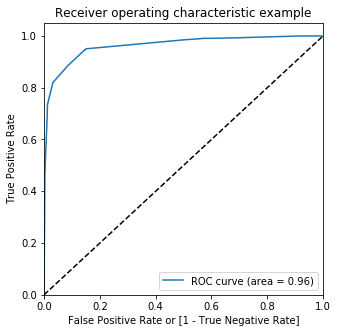

In [123]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Finding Optimal Cutoff Point**

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.884039  0.951015  0.843415
0.2   0.2  0.888204  0.947926  0.851981
0.3   0.3  0.889037  0.946161  0.854390
0.4   0.4  0.912363  0.819506  0.968683
0.5   0.5  0.912529  0.819506  0.968951
0.6   0.6  0.912363  0.819064  0.968951
0.7   0.7  0.911863  0.817299  0.969218
0.8   0.8  0.892203  0.734334  0.987955
0.9   0.9  0.885205  0.715357  0.988223


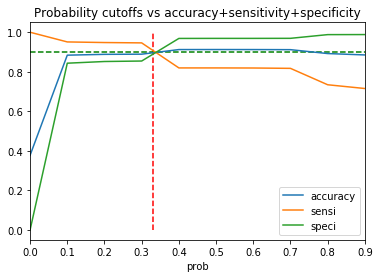

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=.33, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=.9, xmin=0, colors="g", linestyles="--")
plt.title('Probability cutoffs vs accuracy+sensitivity+specificity')
plt.show()

**We got optimal value for all three metrics as 0.33, so lets choose it as our cutoff**

In [127]:
#Creatig a new column with cutoff at 0.33
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9031989336887704

In [129]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3411,  325],
       [ 256, 2010]], dtype=int64)

In [130]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
(TP / float(TP+FN))

0.8870255957634599

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.9130085653104925

In [133]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.0869914346895075


In [134]:
# Positive predictive value 
print (TP / float(TP+FP))

0.860813704496788


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9301881647122989


## Precision and Recall

In [136]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3411,  325],
       [ 256, 2010]], dtype=int64)

In [137]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.860813704496788

In [138]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8870255957634599

### Using sklearn utilities for the same

In [139]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.860813704496788

In [140]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8870255957634599

### Precision and recall tradeoff

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

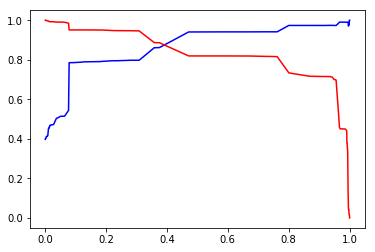

In [142]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The cut off points seems to give us a good model**

## Making Predictions on the Test Set

In [143]:
# Scaling the test set using only transform
X_test[['TotalVisits',
        'Total Time Spent on Website',
        'Page Views Per Visit',
        'A free copy of Mastering The Interview']] = scaler.transform(X_test[['TotalVisits',
                                                                              'Total Time Spent on Website',
                                                                              'Page Views Per Visit',
                                                                              'A free copy of Mastering The Interview']])


C:\Users\BAJARANGI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [144]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
6190,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [146]:
#df after adding constant
X_test_sm.head()

,const,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
6190,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7073,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
440,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [148]:
y_test_pred[:10]

6190    0.000591
7073    0.077626
4519    0.309185
607     0.999825
440     0.077626
4247    0.077626
7431    0.008041
726     0.376039
7300    0.008041
4046    0.077626
dtype: float64

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [151]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
y_pred_final.head()

,Converted,LeadId,0
0,0,6190,0.000591
1,0,7073,0.077626
2,0,4519,0.309185
3,1,607,0.999825
4,0,440,0.077626


In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [156]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadId','Converted','Converted_Prob'], axis=1)

In [157]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,6190,0,0.000591
1,7073,0,0.077626
2,4519,0,0.309185
3,607,1,0.999825
4,440,0,0.077626


In [158]:
#Creating a column final prediction with 0.35 
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [159]:
#view of the df
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9055577147298873

In [161]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1445,  132],
       [ 111,  885]], dtype=int64)

In [162]:
# Let's evaluate the other metrics as well
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8885542168674698

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.9162967660114141

## Lead Score Calculation

### Calculating Lead score for the entire dataset
#### Lead Score = 100 * ConversionProbability
##### This needs to be calculated for all the leads from the original dataset (train + test)

In [165]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [166]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadId','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [168]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


In [169]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [170]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadId'].unique().tolist())

8575

In [171]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadId,Converted,Converted_Prob,final_predicted,Lead_Score
0,8529,0,0.064688,0,6
1,7331,0,0.009566,0,1
2,7688,1,0.762190,1,76
3,92,0,0.077626,0,8
4,4908,0,0.077626,0,8


In [172]:
# Inspecing the max LeadID
lead_full_pred.LeadId.max()

9239

In [173]:

# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadId').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
LeadId,,,,
0,0,0.031109,0,3
1,0,0.009566,0,1
2,1,0.801308,1,80
3,0,0.009566,0,1
4,1,0.955452,1,96


In [174]:
# Slicing the Lead Number column from original_leads dataframe
df_Lead_Number = df[['Lead Number']]
df_Lead_Number.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


#### Concatenating the 2 dataframes based on index.
#### This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [175]:
lead_full_pred.shape

(8575, 4)

In [176]:
df_Lead_Number.shape

(8575, 1)

In [177]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([df_Lead_Number, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,660737,0,0.031109,0,3
1,660728,0,0.009566,0,1
2,660727,1,0.801308,1,80
3,660719,0,0.009566,0,1
4,660681,1,0.955452,1,96
5,660680,0,0.077626,0,8
6,660673,1,0.955452,1,96
7,660664,0,0.077626,0,8
8,660624,0,0.077626,0,8
9,660616,0,0.077626,0,8


In [178]:
# Inspecting the dataframe shape
leads_with_score.shape

(8575, 5)

In [179]:
leads_with_score.sort_values(by='Lead_Score',ascending=False).head(10)

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
4812,613818,1,0.999964,1,100
5354,608784,1,0.997285,1,100
6579,599326,1,0.997827,1,100
9004,581323,1,0.997285,1,100
1965,640590,1,0.999927,1,100
3851,623167,1,0.997827,1,100
4662,614998,1,0.999740,1,100
8993,581407,1,0.997285,1,100
449,655520,1,0.999740,1,100
8989,581416,1,0.997285,1,100


## Determining Feature Importance
#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [180]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            3.61
Lead Quality_Worst                                     -3.18
Asymmetrique Activity Index_03.Low                     -2.34
Tags_Already a student                                 -3.45
Tags_Closed by Horizzon                                 5.44
Tags_Interested  in full time MBA                      -2.66
Tags_Interested in other courses                       -2.63
Tags_Lost to EINS                                       6.71
Tags_Not doing further education                       -3.35
Tags_Ringing                                           -3.84
Tags_Will revert after reading the email                3.87
Tags_opp hangup                                        -3.08
Tags_switched off                                      -4.73
What is your current occupation_Unemployed              1.67
What is your current occupation_Working Professional    1.89
Last Activity_SMS Sent                                  1.97
dtype: float64

In [181]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                            53.85
Lead Quality_Worst                                     -47.38
Asymmetrique Activity Index_03.Low                     -34.87
Tags_Already a student                                 -51.40
Tags_Closed by Horizzon                                 81.12
Tags_Interested  in full time MBA                      -39.59
Tags_Interested in other courses                       -39.26
Tags_Lost to EINS                                      100.00
Tags_Not doing further education                       -49.88
Tags_Ringing                                           -57.17
Tags_Will revert after reading the email                57.67
Tags_opp hangup                                        -45.88
Tags_switched off                                      -70.45
What is your current occupation_Unemployed              24.90
What is your current occupation_Working Professional    28.23
Last Activity_SMS Sent                                  29.34
dtype: f

In [182]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                            12
Lead Quality_Worst                                       9
Asymmetrique Activity Index_03.Low                       3
Tags_Already a student                                   8
Tags_Closed by Horizzon                                  1
Tags_Interested  in full time MBA                       11
Tags_Interested in other courses                         5
Tags_Lost to EINS                                        6
Tags_Not doing further education                         2
Tags_Ringing                                            13
Tags_Will revert after reading the email                14
Tags_opp hangup                                         15
Tags_switched off                                        0
What is your current occupation_Unemployed              10
What is your current occupation_Working Professional     4
Last Activity_SMS Sent                                   7
dtype: int64

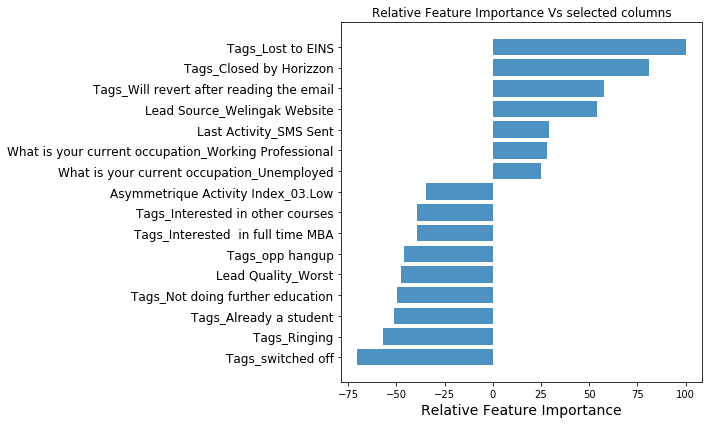

In [183]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)
featax.set_title('Relative Feature Importance Vs selected columns')
plt.tight_layout()   
plt.show()

### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [184]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Lost to EINS,100.00
4,Tags_Closed by Horizzon,81.12
10,Tags_Will revert after reading the email,57.67
